In [1]:
import numpy as np
import pandas as pd

df=pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [2]:
df.shape

(10000, 3)

In [3]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

<Axes: xlabel='Height', ylabel='Count'>

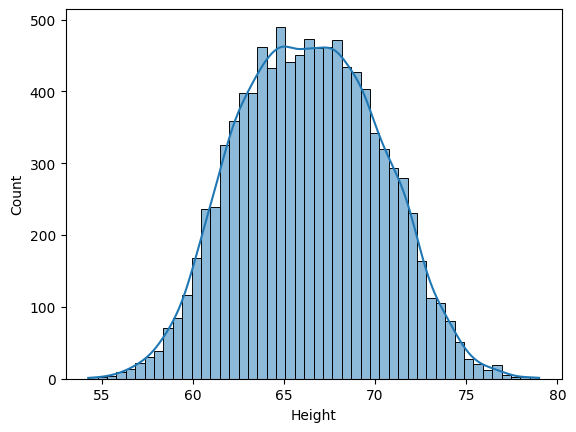

In [4]:
import seaborn as sns
sns.histplot(df['Height'],kde=True)

<Axes: ylabel='Height'>

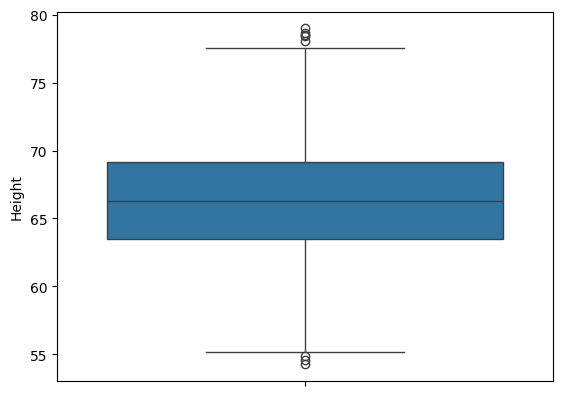

In [5]:

sns.boxplot(df['Height'])

In [6]:
upper_limit = df['Height'].quantile(0.99)
upper_limit

np.float64(74.7857900583366)

In [7]:
lower_limit = df['Height'].quantile(0.01)
lower_limit

np.float64(58.13441158671655)

In [8]:

new_df = df[(df['Height'] <= 74.78) & (df['Height'] >= 58.13)]

In [9]:
new_df['Height'].describe()

count    9799.000000
mean       66.363507
std         3.644267
min        58.134496
25%        63.577147
50%        66.317899
75%        69.119859
max        74.767447
Name: Height, dtype: float64

C:\Users\ayush\AppData\Local\Temp\ipykernel_9620\144369209.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['Height'])


<Axes: xlabel='Height', ylabel='Density'>

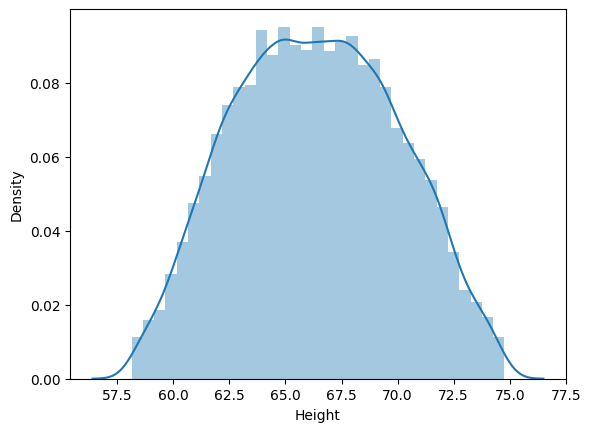

In [10]:

sns.distplot(new_df['Height'])

<Axes: ylabel='Height'>

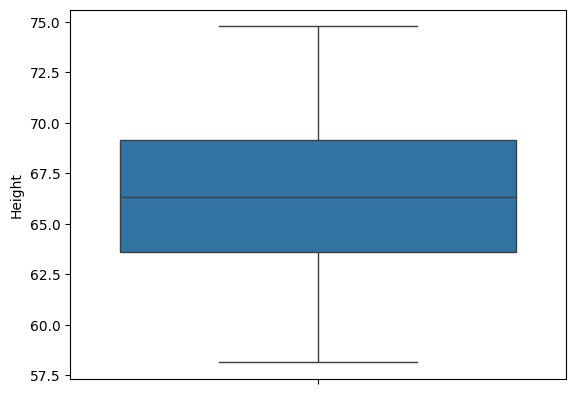

In [11]:
sns.boxplot(new_df['Height'])

In [12]:

# Capping --> Winsorization
df['Height'] = np.where(df['Height'] >= upper_limit,
        upper_limit,
        np.where(df['Height'] <= lower_limit,
        lower_limit,
        df['Height']))

In [13]:

df.shape

(10000, 3)

In [14]:

df['Height'].describe()

count    10000.000000
mean        66.366281
std          3.795717
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785790
Name: Height, dtype: float64

<Axes: xlabel='Height', ylabel='Count'>

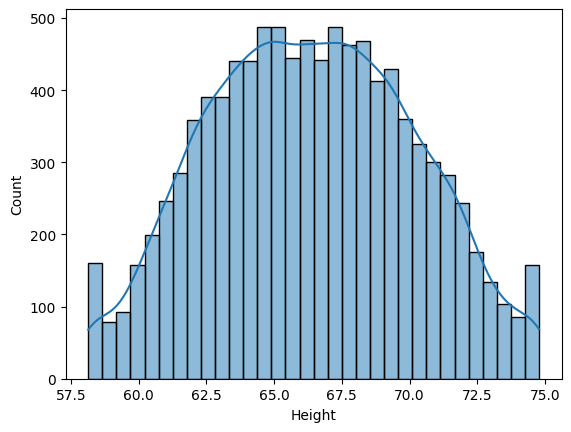

In [15]:
sns.histplot(df['Height'],kde=True)

<Axes: ylabel='Height'>

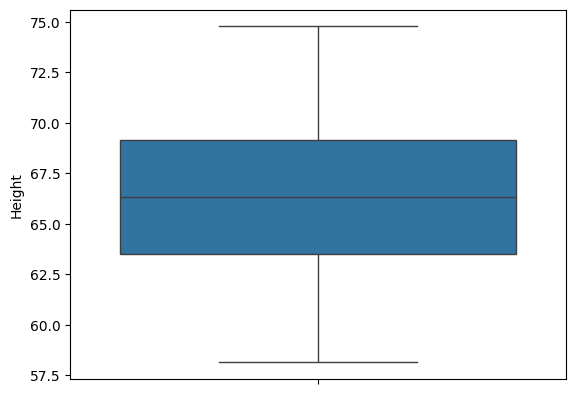

In [16]:
sns.boxplot(df['Height'])